## Working though the outputted flares file to determine the final statistics for the flares sample

This script takes in the final flare samples and outputs analysis of the ...

In [106]:
# Import modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [107]:
# Opening file with flare energies and the star numbers that correspond to 
flares = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_1/final_seen_flares.csv')
star_no = flares['# star_no']

# Opening the binaries dataframe with all of the stars in the sample
binaries = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_1/final_sample_gm_binaries_flux2.csv')
bin_len = len(binaries)

print('In the original run there were ' + str(bin_len) + ' binary systems to consider.')
print('The flare injection process found ' + str(len(flares)) + ' on ' + str(len(set(star_no))) + ' stars.')
print('This means there are ' + str(len(flares)/bin_len) + ' flares found on all the stars in the sample.')
print('And ' + str(round(len(flares)/len(set(star_no)),2)) + ' flares per stars on which flares were found.')

In the original run there were 21078 binary systems to consider.
The flare injection process found 977917 on 20043 stars.
This means there are 46.395151342632126 flares found on all the stars in the sample.
And 48.79 flares per stars on which flares were found.


In [108]:
# Create two new data frames, one for stars that do not show flares and one for star that do show flares
list_o_stars = list(set(star_no))
stars_with_flares = binaries.loc[binaries['# Index'].isin(list_o_stars)] # Stars with flares
stars_no_flares = binaries.loc[~binaries['# Index'].isin(list_o_stars)] # Stars without flares
print('There are ' + str(len(list_o_stars)) + ' stars which show a flare.')
print('This corresponds to a number of rows in the binaries file: ' + str(len(stars_with_flares)))
stars_with_flares_drop = stars_with_flares.drop_duplicates(subset='# Index', keep='first')
print('Having dropped the repeating stars we have: ' + str(len(stars_with_flares_drop)))
stars_with_flares_drop.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/k_run_1/stars_with_flares.csv', index=False) # Save to a new CSV file

There are 20043 stars which show a flare.
This corresponds to a number of rows in the binaries file: 20231
Having dropped the repeating stars we have: 20021


In [116]:
stars_yes = stars_with_flares 
print(str(len(stars_yes)) + ' stars in the sample does show flares.')
stars_no = stars_no_flares
print(str(len(stars_no)) + ' stars in the sample do not show flares.')

20231 stars in the sample does show flares.
847 stars in the sample do not show flares.


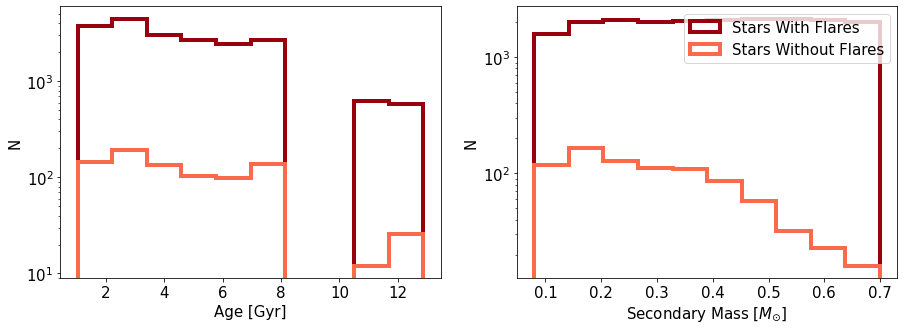

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(10**stars_yes['logAge']/1e9,  histtype='step', edgecolor='#99000d', linewidth=4)
plt.hist(10**stars_no['logAge']/1e9, histtype='step', edgecolor='#fb6a4a', linewidth=4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age [Gyr]', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.yscale('log')

plt.subplot(122)
plt.hist(stars_yes['sec_mass'], range=(min(stars_no['sec_mass']), max(stars_yes['sec_mass'])), histtype='step', label='Stars With Flares', edgecolor='#99000d', linewidth=4)
plt.hist(stars_no['sec_mass'], range=(min(stars_no['sec_mass']), max(stars_yes['sec_mass'])), histtype='step', label='Stars Without Flares', edgecolor='#fb6a4a', linewidth=4)
plt.legend(loc='best', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'Secondary Mass [$M_{\odot}$]', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.yscale('log')

plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_1/plots/flaring_stars.png')

In [121]:
#with open('/Users/jess/sf_m_dwarfs/sf_data_files/run_1/final_results.txt', 'w') as f:
print('The shortest flare in this sample is ' + str(round(min(flares[' duration']),2)) + ' minutes.')#, file=f)
print('The longest flare is ' + str(round(max(flares[' duration'])/60,2)) + ' hours.')#, file=f)

The shortest flare in this sample is 56.22 minutes.
The longest flare is 338.95 hours.


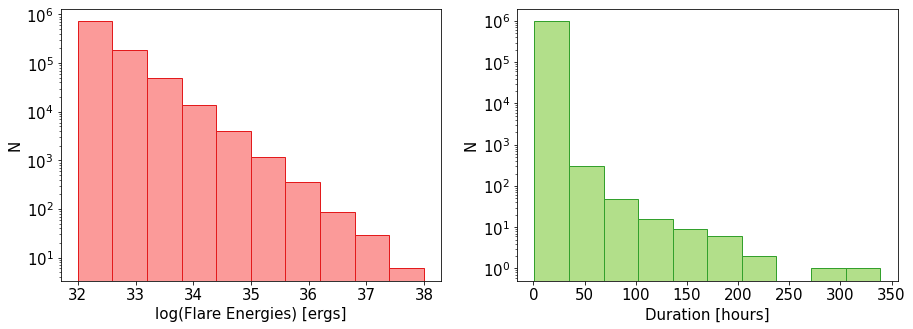

In [122]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(np.log10(flares[' energy']), color='#fb9a99', edgecolor='#e31a1c')
plt.ylabel('N', fontsize=15)
plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.hist(flares[' duration']/60, color='#b2df8a', edgecolor='#33a02c')
plt.ylabel('N', fontsize=15)
plt.xlabel('Duration [hours]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_all_duration_and_energies.png')
plt.show()

In [123]:
# Cutting flares for energy - only include 'sueprflares'.
rows = flares[(flares[" energy"] >= 1e34)]
rows.to_csv('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_4/final_seen_superflares.csv')
#with open('/users/jess/sf_m_dwarfs/sf_data_files/run_1/final_results.txt', 'a') as f:

n_superflares = len(rows)
n_stars_with_flares = len(set(rows['# star_no']))

print(str(len(rows)) + ' flares can be classes as superflares.') #, file=f)
print('These superflares were found on ' + str(len(set(rows['# star_no']))) + ' stars.')
print('This results in a value of ' + str(round(len(rows)/len(set(rows['# star_no'])),2)) + ' flares per star.')

13055 flares can be classes as superflares.
These superflares were found on 8659 stars.
This results in a value of 1.51 flares per star.


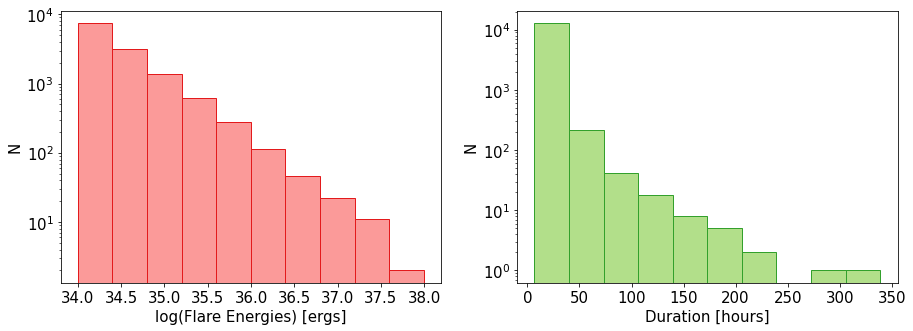

In [124]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(np.log10(rows[' energy']), color='#fb9a99', edgecolor='#e31a1c')
plt.ylabel('N', fontsize=15)
plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.hist(rows[' duration']/60, color='#b2df8a', edgecolor='#33a02c')
plt.ylabel('N', fontsize=15)
plt.xlabel('Duration [hours]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_4/plots/P_sf_duration_and_energies.png')
plt.show()

In [125]:
# Cut down to duration 
#with open('/users/jess/sf_m_dwarfs/sf_data_files/run_1/final_results.txt', 'a') as f:
print('In the superflare sample the shortest flare is: ' + str(round(min(rows[' duration']),2)) + ' minutes.') #, file=f)
print('In the superflare sample the longest flare is: ' + str(round(max(rows[' duration']/60),2)) + ' hours.') #, file=f)
print('None of these flares are short enough for us to worry about the cadence of the light curves.')

In the superflare sample the shortest flare is: 401.35 minutes.
In the superflare sample the longest flare is: 338.95 hours.
None of these flares are short enough for us to worry about the cadence of the light curves.


In [126]:
# Defining a function for the Poisson statistics
def poisson(n_flares, n_sample):
    
    frac = float(n_flares)/n_sample

    delt = frac * math.sqrt(n_flares**-1 + n_sample**-1)
    max_lim = frac + delt 
    min_lim = frac - delt 
    
    #with open('/users/jess/sf_m_dwarfs/sf_data_files/run_1/final_results.txt', 'a') as f:
    print('The fraction of flares per star is: ' + str(round(frac,2))) #, file=f)
    print("The maximum limit is: " + str(round(max_lim,2)) + " and the minimum limit is: " + str(round(min_lim,2))) #, file=f)
    print("The Possion error for the number of flares per star is: " + str(round(delt,2))) #, file=f)

In [127]:
poisson(n_superflares, n_stars_with_flares)

The fraction of flares per star is: 1.51
The maximum limit is: 1.53 and the minimum limit is: 1.49
The Possion error for the number of flares per star is: 0.02
